In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pingouin as pg
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import math
import seaborn as sns
import pickle
import h5py
import xlrd
import xlwt
import heapq
import maskdb_parsing as maskdb
import nibabel as nib
from sklearn.decomposition import PCA
from scipy.stats import norm

/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
df_maskdatabase = h5py.File('MaskDatabase.mat', 'r')
def get_mask_name(mask_no):
    st = df_maskdatabase['MaskDatabaseNames'][mask_no][0]
    obj = df_maskdatabase[st]
    str1 = ''.join(chr(i) for i in obj[:])
    return str1
mask_volume_list = []
mask_name_list = []
for i in range (294):
    mask_name = get_mask_name(i)
    mask_name_list.append(mask_name)
    mask_volume = df_maskdatabase['MaskDatabase']['jc'][i+1]-df_maskdatabase['MaskDatabase']['jc'][i]
    mask_volume_list.append(mask_volume)
df_mask_volume = pd.Series(mask_volume_list, index=mask_name_list)

In [37]:
dic_nos1_95 = {}
dic_vglu2b_95 = {}
wdir = '/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/HCR/HCR_analysis/'
for file in os.listdir(wdir):
    if file.startswith('20230721'):
        gene = file.split("_")[1]
        if gene == 'vglu2b':
            fish_id = file.split("_")[0]
            df = pd.read_csv(wdir+file, sep=',', index_col = 0)
            dic_vglu2b_95.update({fish_id:df})
        elif gene == 'nos1':
            fish_id = file.split("_")[0]
            df = pd.read_csv(wdir+file, sep=',', index_col = 0)
            dic_nos1_95.update({fish_id:df})
    elif file == 'sv_metadata.csv':
        metadata = pd.read_csv(wdir+file)

In [38]:
ex_count_list = []
for fish in dic_nos1_95.keys():
    ex_count_list.append(dic_nos1_95[fish]['ex_count'])
df_nos1_ex = pd.concat(ex_count_list,axis=1)
df_nos1_ex.columns = dic_nos1_95.keys()
df_nos1_ex = pd.concat((df_nos1_ex,df_mask_volume),axis=1)
df_nos1_ex.rename(columns = {0:'total'}, inplace=True)
df_nos1_ex[metadata.loc[metadata.sort_values('Geno')['Fish_id'].isin(list(dic_nos1_95.keys()))]['Fish_id'].to_list()+['total']]

,20230721-1D,20230721-13A,20230721-5E,20230721-7C,20230721-13F,20230721-19F,total
Diencephalon -,1589741.0,1489174.0,1302013.0,1487475.0,1438355.0,1432073.0,5314833.0
Diencephalon - Anterior group of the posterior tubercular vmat2 neurons,3206.0,4472.0,3775.0,4451.0,4896.0,4236.0,5938.0
Diencephalon - Anterior preoptic dopaminergic cluster,2827.0,2483.0,1594.0,1970.0,4281.0,3385.0,8496.0
Diencephalon - Anterior pretectum cluster of vmat2 Neurons,23340.0,21111.0,17894.0,31856.0,27301.0,29505.0,177957.0
Diencephalon - Caudal Hypothalamus,57324.0,76402.0,54357.0,110659.0,102181.0,106061.0,458300.0
...,...,...,...,...,...,...,...
Telencephalon - Subpallium,294948.0,212328.0,271672.0,268780.0,286145.0,321639.0,597260.0
Telencephalon - Telencephalic Migrated Area 4 (M4),12688.0,14734.0,18825.0,9541.0,7743.0,9723.0,31219.0
Telencephalon - Vglut2 rind,196073.0,190762.0,200440.0,193298.0,181154.0,195125.0,314040.0
Telencephalon - Vmat2 cluster,24760.0,22308.0,22577.0,22697.0,23148.0,25735.0,61302.0


In [39]:
##excclude masks with in Eyes and one other mask below
df_nos1_ex = df_nos1_ex.drop('Rhombencephalon - VII\' Facial Motor and octavolateralis efferent neurons')
df_nos1_ex = df_nos1_ex.loc[~df_nos1_ex.index.str.contains('Eyes')]
df_nos1_ex_rank = (df_nos1_ex.iloc[:,:-1].mean(axis=1)/df_nos1_ex['total']).sort_values()
df_nos1_ex_rank = df_nos1_ex_rank.dropna()
df_nos1_ex_rank.tail(20)

Rhombencephalon - Glyt2 Stripe 1                                           0.514303
Diencephalon - Isl1 cluster 3                                              0.519971
Rhombencephalon - Ptf1a Stripe                                             0.535236
Telencephalon - Pallium                                                    0.538405
Diencephalon - Hypothalamus Qrfp neuron cluster                            0.579844
Telencephalon - Vglut2 rind                                                0.613962
Ganglia - Lateral Line Neuromast SO1                                       0.620482
Telencephalon - Subpallial Otpb Cluster 2                                  0.632289
Telencephalon - S1181t Cluster                                             0.667563
Diencephalon - Hypothalamus s1181t Cluster                                 0.672854
Ganglia - Lateral Line Neuromast SO2                                       0.686780
Diencephalon - Anterior group of the posterior tubercular vmat2 neurons    0

### 4.compare the nos1 expression across different sample groups

In [40]:
## compute the nos1 expression of big masks 
df_bigmask = df_nos1_ex.loc[df_nos1_ex.index.str.split('-').str[-1].str.len()==0].transpose()
df_bigmask = pd.concat((metadata.sort_values('Geno').set_index('Fish_id'),df_bigmask), axis=1)
df_bigmask = df_bigmask.drop('total')
df_bigmask['Whole_brain'] = df_bigmask.iloc[:,1:].sum(axis=1)

In [41]:
df_bigmask

,Geno,Diencephalon -,Mesencephalon -,Rhombencephalon -,Telencephalon -,Whole_brain
20230721-1D,SDA,1589741.0,1548914.0,1664967.0,877965.0,5681587.0
20230721-13A,SDA,1489174.0,1401767.0,1770592.0,761267.0,5422800.0
20230721-5E,SDA,1302013.0,1376209.0,1426900.0,892704.0,4997826.0
20230721-7C,VDA,1487475.0,1616969.0,1884461.0,841679.0,5830584.0
20230721-13F,VDA,1438355.0,1513229.0,1829077.0,925469.0,5706130.0
20230721-19F,VDA,1432073.0,1605388.0,1884364.0,978352.0,5900177.0


In [42]:
## comparison of each big mask didn't detect difference between three genotypes
p_val_list = []
for bigmask in df_bigmask.columns[1:5]:
    p_val = pg.ancova(data = df_bigmask, dv = bigmask, covar='Whole_brain', between='Geno')
    p_val = p_val.iloc[0,4]
    p_val_list.append(p_val)
df_com_res_bigmask = pd.Series(p_val_list, index = df_bigmask.columns[1:5])
df_com_res_bigmask

Diencephalon -       0.032011
Mesencephalon -      0.721201
Rhombencephalon -    0.555389
Telencephalon -      0.437724
dtype: float64

In [43]:
df_ex_count = df_nos1_ex.copy()
df_comp = pd.concat((metadata[metadata['Fish_id'].isin(df_ex_count.columns)].sort_values('Geno').set_index('Fish_id'),
                     df_ex_count.transpose()),
          axis=1)
df_comp = df_comp.dropna()
#eliminate masks with 0 experssion in one individual
df_comp = df_comp.loc[:,~(df_comp==0).any()]
df_comp

,Geno,Diencephalon -,Diencephalon - Anterior group of the posterior tubercular vmat2 neurons,Diencephalon - Anterior preoptic dopaminergic cluster,Diencephalon - Anterior pretectum cluster of vmat2 Neurons,Diencephalon - Caudal Hypothalamus,Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum,Diencephalon - Dopaminergic Cluster 3 - hypothalamus,...,Telencephalon - S1181t Cluster,Telencephalon - Subpallial Gad1b cluster,Telencephalon - Subpallial Otpb Cluster 2,Telencephalon - Subpallial Otpb strip,Telencephalon - Subpallial Vglut2 Cluster,Telencephalon - Subpallial dopaminergic cluster,Telencephalon - Subpallium,Telencephalon - Telencephalic Migrated Area 4 (M4),Telencephalon - Vglut2 rind,Telencephalon - Vmat2 cluster
20230721-1D,SDA,1589741.0,3206.0,2827.0,23340.0,57324.0,71394.0,13550.0,8570.0,7421.0,...,42785.0,162146.0,52923.0,12275.0,9413.0,10802.0,294948.0,12688.0,196073.0,24760.0
20230721-13A,SDA,1489174.0,4472.0,2483.0,21111.0,76402.0,64066.0,14409.0,10066.0,8600.0,...,42479.0,122770.0,53098.0,12050.0,2300.0,10231.0,212328.0,14734.0,190762.0,22308.0
20230721-5E,SDA,1302013.0,3775.0,1594.0,17894.0,54357.0,75466.0,16294.0,5371.0,7890.0,...,40788.0,151306.0,50266.0,12333.0,7591.0,11315.0,271672.0,18825.0,200440.0,22577.0
20230721-7C,VDA,1487475.0,4451.0,1970.0,31856.0,110659.0,62408.0,13867.0,10125.0,8932.0,...,37674.0,158267.0,49208.0,11344.0,4826.0,11047.0,268780.0,9541.0,193298.0,22697.0
20230721-13F,VDA,1438355.0,4896.0,4281.0,27301.0,102181.0,86859.0,14333.0,10561.0,9325.0,...,35112.0,145251.0,43878.0,12591.0,10067.0,9628.0,286145.0,7743.0,181154.0,23148.0
20230721-19F,VDA,1432073.0,4236.0,3385.0,29505.0,106061.0,70110.0,12915.0,8662.0,8418.0,...,40283.0,171832.0,50207.0,12270.0,12169.0,12246.0,321639.0,9723.0,195125.0,25735.0


In [80]:
output_dir='/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/HCR/HCR_analysis/'
df_comp.transpose().to_csv(output_dir+'sv_nos1_ex_count_raw_20230819.csv')

In [51]:
##kruskal method (non-parametric anova)
def kruskal_comp(df_comp):

    kruskal_list = []
    for mask in df_comp.columns[1:]:
        kruskal = pg.kruskal(dv=mask, between='Geno', data=df_comp)
        kruskal_list.append(kruskal)

    df_res = pd.concat(kruskal_list)
    df_res.index = df_comp.columns[1:]
    return df_res
##anova
def anova_comp(df_comp):

    anova_list = []
    for mask in df_comp.columns[1:]:
        anova = pg.anova(dv=mask, between='Geno', data=df_comp)
        anova_list.append(anova)

    df_res = pd.concat(anova_list)
    df_res.index = df_comp.columns[1:]
    return df_res
##ancova
def ancova(df_comp):
    bigmasks = df_comp.loc[:,df_comp.columns.str.split('-').str[-1].str.len()==0].columns
    ancova_list = []
    mask_list = []
    for mask in df_comp.columns[1:]:
        if mask not in bigmasks and (mask.split('-')[0]+'-') in bigmasks:
            covariable = mask.split('-')[0]+'-'
            ancova = pg.ancova(data = df_comp, dv = mask, covar=covariable, between='Geno')
            ancova_list.append(ancova.iloc[0,4])
            mask_list.append(mask)
        else: 
            next
    df_res = pd.Series(ancova_list)
    df_res.index = mask_list
    return df_res

def permutation_ancova(df_comp, perm_no):
    df_ancova_res = ancova(df_comp)
    df_perm_res = pd.concat((df_ancova_res , pd.Series(0, df_ancova_res.index)),axis=1)
    df_perm_res.rename(columns={0:'p-unc'}, inplace=True)
    df_adj_p_ancova = df_perm_res.copy()
    mse_list = []
    for i in range (1,perm_no):
        df_perm = df_comp.copy()
        df_perm['Geno'] = df_perm['Geno'].sample(frac=1).values
        df_perm_res[i]=ancova(df_perm)
        df_perm_zscore = pd.concat([df_perm_res['p-unc'], df_perm_res.iloc[:,1:].mean(axis=1), df_perm_res.iloc[:,1:].std(axis=1)], axis=1)
        df_perm_zscore.rename(columns={0:'mean', 1:'std'}, inplace=True)
        df_perm_zscore['zscore'] = (df_perm_zscore['p-unc']-df_perm_zscore['mean'])/df_perm_zscore['std']
        df_perm_zscore['adj_p'] = df_perm_zscore['zscore'].apply(lambda x: 1-norm.sf((x)))
        df_adj_p_ancova[i] = df_perm_zscore['adj_p']
        if i>=20:
            mse = (((df_adj_p_ancova[i]-df_adj_p_ancova[i-1])**2).sum())/(df_comp.shape[1]-5)
            mse_list.append(mse)
            if mse<1e-08:
                break
        if i%100==0:
            print(i)
    return (df_adj_p_ancova,mse_list)

def permutation_anova(df_comp, perm_no):
    df_anova_res = anova_comp(df_comp)
    df_perm_res = pd.concat((df_anova_res['p-unc'] , pd.Series(0, df_anova_res.index)),axis=1)
    #df_perm_res.rename(columns={0:'p-unc'}, inplace=True)
    df_adj_p_anova = df_perm_res.copy()
    mse_list = []
    for i in range (1,perm_no):
        df_perm = df_comp.copy()
        df_perm['Geno'] = df_perm['Geno'].sample(frac=1).values
        df_perm_res[i]=anova_comp(df_perm)['p-unc']
        df_perm_zscore = pd.concat([df_perm_res['p-unc'], df_perm_res.iloc[:,1:].mean(axis=1), df_perm_res.iloc[:,1:].std(axis=1)], axis=1)
        df_perm_zscore.rename(columns={0:'mean', 1:'std'}, inplace=True)
        df_perm_zscore['zscore'] = (df_perm_zscore['p-unc']-df_perm_zscore['mean'])/df_perm_zscore['std']
        df_perm_zscore['adj_p'] = df_perm_zscore['zscore'].apply(lambda x: 1-norm.sf((x)))
        df_adj_p_anova[i] = df_perm_zscore['adj_p']
        if i>=20:
            mse = (((df_adj_p_anova[i]-df_adj_p_anova[i-1])**2).sum())/(df_comp.shape[1]-5)
            mse_list.append(mse)
            if mse<1e-08:
                break
        if i%100==0:
            print(i)
    return (df_adj_p_anova,mse_list)


def ratio_median_norm(df_comp):
    df_comp_norm = df_comp.loc[:,~df_comp.columns.isin(df_bigmask.columns[1:5])].iloc[:,1:].transpose()

    df_comp_norm['Genometric_mean'] = stats.gmean(df_comp_norm,axis=1)

    df_comp_norm = df_comp_norm.loc[df_comp_norm['Genometric_mean']!=0]

    for i in range(df_comp_norm.shape[1]-1):
        df_comp_norm.iloc[:,i] = df_comp_norm.iloc[:,i]/(df_comp_norm.iloc[:,i]/df_comp_norm.iloc[:,-1]).median()

    df_comp_norm = pd.concat((df_comp['Geno'],df_comp_norm.transpose(),df_comp[df_bigmask.columns[1:5]]),axis=1)
    df_comp_norm = df_comp_norm.drop('Genometric_mean')
    return df_comp_norm

def box_scatter_plot(sigmasks, df_comp, dotsize, xticklabel, figsize):
    df_temp_list = []
    for mask in sorted(list(sigmasks)):
        covariable = mask.split('-')[0]+'-'
        df_temp = df_comp.loc[:,['Geno', mask, covariable]]
        df_temp.loc[:,'mask'] = mask
        df_temp.rename(columns={mask:'HCR'}, inplace=True)
        #df_temp['HCR'] = df_temp['HCR']/df_temp[covariable]
        df_temp['HCR'] = (df_temp['HCR']-df_temp['HCR'].mean())/df_temp['HCR'].std()
        df_temp_list.append(df_temp)
    df_plot = pd.concat(df_temp_list)
    df_plot['Geno'] = df_plot['Geno'].map({'VDA':'Control', 'SDA':'SDA'})
    ## plot the data
    font_size = 2*len(list(sigmasks))
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.boxplot(x="mask", y="HCR", hue="Geno",
                data = df_plot.sort_values('Geno'),ax=ax, palette = ['#B0DAEF','#DE8CBB'])

    sns.stripplot(x="mask", y="HCR", hue="Geno",data=df_plot.sort_values('Geno'), 
                  jitter=True,dodge=True, marker='o', palette = ['#B0DAEF','#DE8CBB'],edgecolor='#808080',
                  ax=ax, size=dotsize, linewidth=4)
    if xticklabel==True:
        ax.set_xticklabels(labels = sorted(list(sigmasks)),
                           ha='right', fontsize=font_size)
    else:
        ax.set_xticklabels('')
    ax.set_yticks(np.arange(-2,4,2))
    #ax.set_yticklabels(labels = np.arange(0,1.5,0.5).round(1),fontsize=font_size)
    ax.set_yticklabels('')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend("",frameon=False, loc = [0, 0.9])
    plt.show()


### ancova with non-normalized data

In [12]:
df_res = ancova(df_comp)
df_res.loc[df_res<=0.05].sort_values()

Mesencephalon - Tecum Neuropil                                      0.000107
Diencephalon - Retinal Arborization Field 4 (AF4)                   0.000483
Diencephalon - Retinal Arborization Field 5 (AF5)                   0.002520
Diencephalon - Anterior pretectum cluster of vmat2 Neurons          0.005294
Rhombencephalon - Otpb Cluster 1                                    0.005949
Rhombencephalon - Gad1b Cluster 1                                   0.006435
Mesencephalon - Retinal Arborization Field 8 (AF8)                  0.007480
Diencephalon - Pretectal dopaminergic cluster                       0.009459
Diencephalon - Caudal Hypothalamus                                  0.011995
Diencephalon - Hypothalamus - Caudal Hypothalamus Neural Cluster    0.015717
Mesencephalon - Ptf1a Cluster                                       0.019988
Diencephalon - Hypothalamus Gad1b Cluster 3 Sparse                  0.027332
Rhombencephalon - Neuropil Region 3                                 0.028224

### permutation-anova with normalized data

In [46]:
df_comp_norm = ratio_median_norm(df_comp)
df_comp_norm

,Geno,Diencephalon - Anterior group of the posterior tubercular vmat2 neurons,Diencephalon - Anterior preoptic dopaminergic cluster,Diencephalon - Anterior pretectum cluster of vmat2 Neurons,Diencephalon - Caudal Hypothalamus,Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum,Diencephalon - Dopaminergic Cluster 3 - hypothalamus,Diencephalon - Dopaminergic Cluster 4/5 - posterior tuberculum and hypothalamus,...,Telencephalon - Subpallial Vglut2 Cluster,Telencephalon - Subpallial dopaminergic cluster,Telencephalon - Subpallium,Telencephalon - Telencephalic Migrated Area 4 (M4),Telencephalon - Vglut2 rind,Telencephalon - Vmat2 cluster,Diencephalon -,Mesencephalon -,Rhombencephalon -,Telencephalon -
20230721-1D,SDA,3051.383343,2690.661482,22214.375304,54559.419448,67950.861629,12896.520367,8156.692217,7063.105361,7544.702358,...,8959.036621,10281.048930,280723.460457,12076.092282,186616.932687,23565.892567,1589741.0,1548914.0,1664967.0,877965.0
20230721-13A,SDA,4595.936829,2551.813762,21696.069407,78519.401964,65841.522555,14808.330448,10344.968720,8838.340055,2904.319651,...,2363.742108,10514.541524,218212.449677,15142.337485,196048.770418,22926.243017,1489174.0,1401767.0,1770592.0,761267.0
20230721-5E,SDA,4485.701706,1894.094972,21262.820218,64590.539768,89673.633094,19361.595654,6382.173208,9375.413631,3666.986878,...,9020.122291,13445.222464,322818.424853,22369.095261,238175.907261,26827.466864,1302013.0,1376209.0,1426900.0,892704.0
20230721-7C,VDA,3923.367185,1736.471210,28079.709062,97541.201817,55009.997587,12223.170692,8924.756851,7873.178093,4238.928958,...,4253.913735,9737.460636,236918.137923,8409.985691,170383.965415,20006.440124,1487475.0,1616969.0,1884461.0,841679.0
20230721-13F,VDA,4563.797908,3990.526725,25448.579799,95247.841927,80965.466201,13360.481091,9844.417833,8692.282577,5733.643982,...,9383.936590,8974.723501,266729.565459,7217.624021,168862.386906,21577.368052,1438355.0,1513229.0,1829077.0,925469.0
20230721-19F,VDA,3677.385873,2938.609816,25614.086448,92074.415278,60864.382338,11211.859904,7519.715872,7307.892890,3098.345180,...,10564.237180,10631.082957,279223.492667,8440.798595,169393.276333,22341.247746,1432073.0,1605388.0,1884364.0,978352.0


In [79]:
output_dir='/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/HCR/HCR_analysis/'
df_comp_norm.transpose().to_csv(output_dir+'sv_nos1_ex_count_normalized_20230819.csv')

In [14]:
arraylist = [df_comp_norm['Geno'].to_list()]
while len(arraylist)<20:#the maximum round of permutation test based on current dataset is 210
    
    array = df_comp_norm['Geno'].sample(frac=1).to_list()
    if array in arraylist:
        next
    else:
        arraylist.append(array)

In [29]:
df_perm = df_comp_norm.copy()
permpvals = []
for array in arraylist:
    num = arraylist.index(array)
    if num%50 == 0:
        print(num)
    df_perm['Geno'] = array
    permpvals.append(anova_comp(df_perm))
df_perm = pd.concat(permpvals,axis=1)
df_exp_anova = anova_comp(df_comp_norm)['p-unc']
df_padj_anova = ((df_exp_anova-df_perm['p-unc'].mean(axis=1))/df_perm['p-unc'].std(axis=1)).apply(lambda x: 1-norm.sf((x)))

0


In [28]:
sigmask_perm_anova = df_padj_anova.loc[df_padj_anova<0.05].index.to_list()
pco_list = []
masks = []
for mask in sigmask_perm_anova:
    covariable = mask.split('-')[0]+'-'
    pco = pg.ancova(data = df_comp_norm, dv = mask, covar=covariable, between='Geno').iloc[1,4]
    pval = pg.ancova(data = df_comp_norm, dv = mask, covar=covariable, between='Geno').iloc[0,4]
    pco_list.append(pco)
    if pco<0.05 and pval>0.05:
        masks.append(mask)
        sigmask_perm_anova.remove(mask)
sigmask_perm_anova

['Diencephalon - Anterior pretectum cluster of vmat2 Neurons',
 'Diencephalon - Hypothalamus - Caudal Hypothalamus Neural Cluster',
 'Diencephalon - Hypothalamus Gad1b Cluster 1',
 'Diencephalon - Medial vglut2 cluster',
 'Diencephalon - Pineal',
 'Diencephalon - Posterior Tuberculum',
 'Diencephalon - Retinal Arborization Field 4 (AF4)',
 'Diencephalon - Rostral Hypothalamus',
 'Mesencephalon - Retinal Arborization Field 8 (AF8)',
 'Mesencephalon - Vmat2 cluster of paraventricular organ',
 'Rhombencephalon - Cerebelluar-Vglut2 enriched areas',
 'Rhombencephalon - Gad1b Cluster 15',
 'Rhombencephalon - Lateral Reticular Nucleus',
 'Rhombencephalon - Neuropil Region 3',
 'Rhombencephalon - Neuropil Region 4',
 'Rhombencephalon - Vmat2 Cluster 5',
 'Telencephalon - S1181t Cluster',
 'Telencephalon - Subpallial Otpb Cluster 2']

### permutate to get empirical ancova p-val

In [25]:
df_perm = df_comp_norm.copy()
permpvals = []
for array in arraylist:
    df_perm['Geno'] = array
    permpvals.append(ancova(df_perm))
df_perm = pd.concat(permpvals,axis=1)
df_exp_ancova = ancova(df_comp_norm)
df_padj_ancova = ((df_exp_ancova-df_perm.mean(axis=1))/df_perm.std(axis=1)).apply(lambda x: 1-norm.sf((x)))

In [33]:
df_exp_ancova = ancova(df_comp_norm)

sigmask_perm_ancova = df_padj_ancova.loc[df_padj_ancova<0.05].index

### combine anova result with ancova result

In [34]:
ko_sigmasks = set(sigmask_perm_anova)|set(sigmask_perm_ancova)
ko_sigmasks

{'Diencephalon - Anterior pretectum cluster of vmat2 Neurons',
 'Diencephalon - Caudal Hypothalamus',
 'Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons',
 'Diencephalon - Hypothalamus - Caudal Hypothalamus Neural Cluster',
 'Diencephalon - Hypothalamus Gad1b Cluster 1',
 'Diencephalon - Hypothalamus Vglut2 Cluster 5',
 'Diencephalon - Medial vglut2 cluster',
 'Diencephalon - Pineal',
 'Diencephalon - Pineal Vmat2 cluster ',
 'Diencephalon - Pituitary',
 'Diencephalon - Posterior Tuberculum',
 'Diencephalon - Preoptic area posterior dopaminergic cluster',
 'Diencephalon - Retinal Arborization Field 4 (AF4)',
 'Diencephalon - Retinal Arborization Field 5 (AF5)',
 'Diencephalon - Rostral Hypothalamus',
 'Mesencephalon - Retinal Arborization Field 8 (AF8)',
 'Mesencephalon - Vmat2 cluster of paraventricular organ',
 'Rhombencephalon - Cerebelluar-Vglut2 enriched areas',
 'Rhombencephalon - Gad1b Cluster 1',
 'Rhombencephalon - Ga

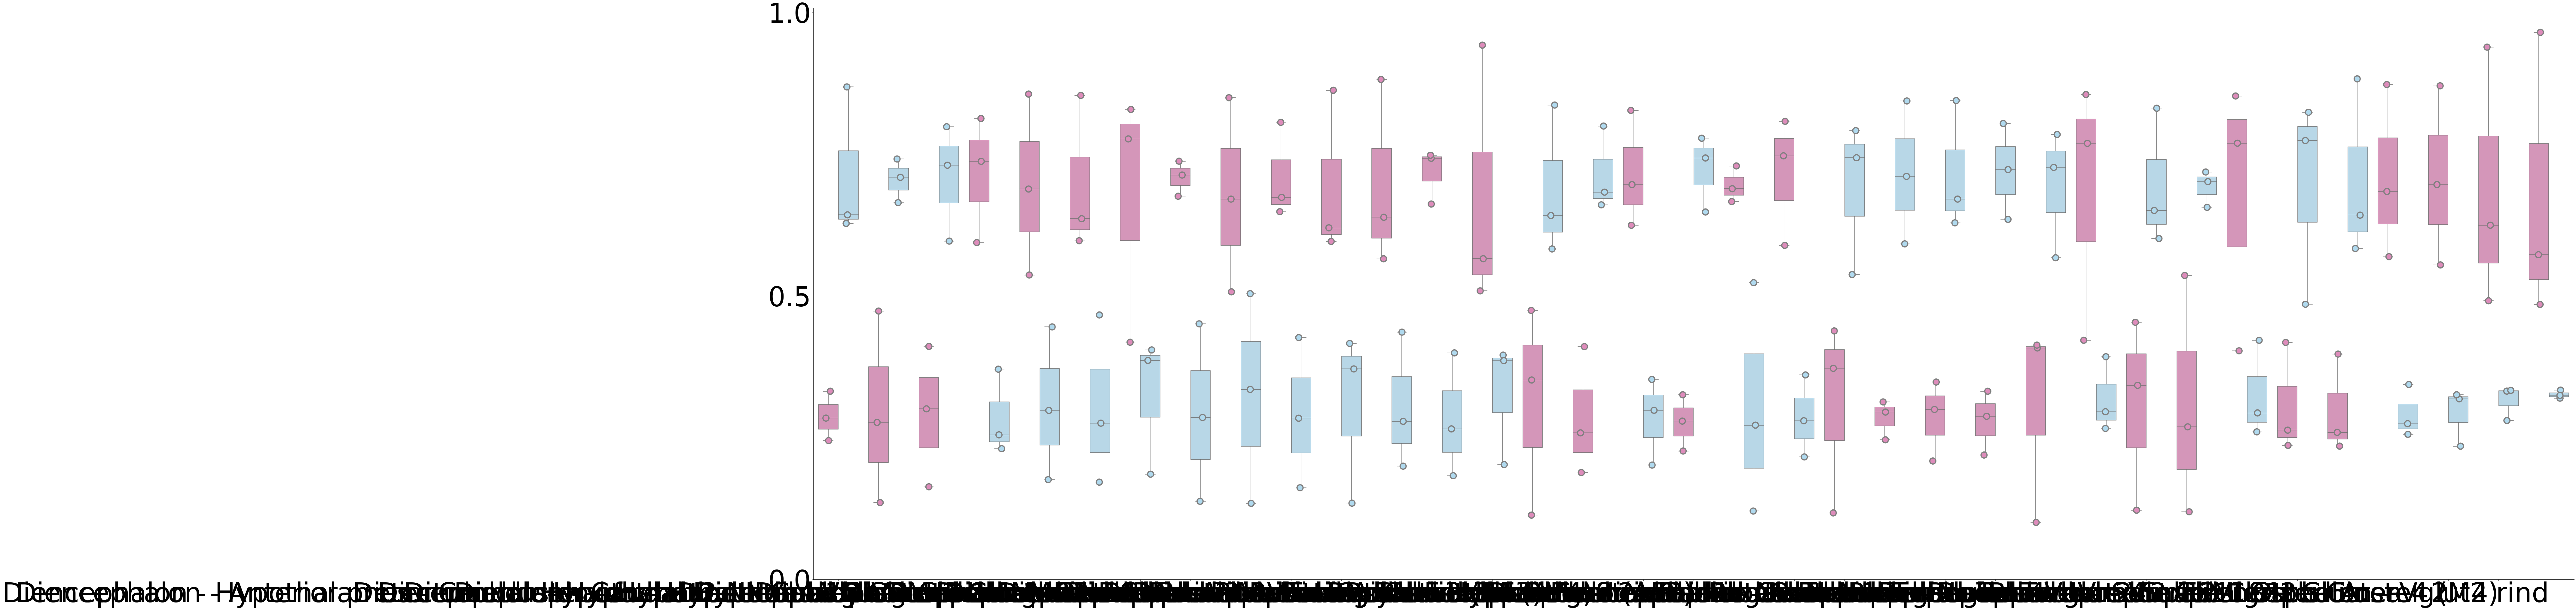

In [22]:
box_scatter_plot(ko_sigmasks, df_comp_norm, 20, True)

In [59]:
df_sv_stats = pd.concat((df_exp_anova, df_exp_ancova, df_padj_anova, df_padj_ancova),axis=1)
df_sv_stats.columns = ['p_unc_anova', 'p_unc_ancova','p_adj_anova', 'p_adj_ancova']
df_sv_stats = df_sv_stats.loc[~df_sv_stats.index.isin(df_bigmask.columns)]
df_sv_stats = df_sv_stats.dropna() ## drop tested masks in spinal cord or Ganglia

In [60]:
output_dir = '/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/HCR/HCR_analysis/'
df_sv_stats.to_csv(output_dir+'sv_stats_20230819.csv')


In [74]:
df_comp_norm[['Geno']+list(ko_sigmasks)].groupby('Geno').mean()

,Telencephalon - S1181t Cluster,Diencephalon - Pineal,Diencephalon - Anterior pretectum cluster of vmat2 Neurons,Diencephalon - Posterior Tuberculum,Diencephalon - Pineal Vmat2 cluster,Diencephalon - Preoptic area posterior dopaminergic cluster,Diencephalon - Retinal Arborization Field 5 (AF5),Diencephalon - Medial vglut2 cluster,Diencephalon - Rostral Hypothalamus,Mesencephalon - Retinal Arborization Field 8 (AF8),...,Rhombencephalon - Lateral Reticular Nucleus,Mesencephalon - Vmat2 cluster of paraventricular organ,Diencephalon - Retinal Arborization Field 4 (AF4),Rhombencephalon - Neuropil Region 3,Diencephalon - Caudal Hypothalamus,Rhombencephalon - Gad1b Cluster 1,Rhombencephalon - Vmat2 Cluster 5,Rhombencephalon - Gad1b Cluster 15,Diencephalon - Hypothalamus - Caudal Hypothalamus Neural Cluster,Diencephalon - Hypothalamus Vglut2 Cluster 5
Geno,,,,,,,,,,,,,,,,,,,,,
SDA,44281.608120,15482.437679,21724.421643,145633.734841,14425.100595,5637.740308,1041.455427,24278.496735,146601.524880,112.579568,...,132.643767,17285.382089,912.302936,13287.585586,65889.787060,14592.980832,6805.353586,123.621282,26969.223465,29220.753837
VDA,33636.125836,11980.585846,26380.791770,118513.510295,11351.077655,3808.313101,1888.635179,19585.029573,116619.341045,678.726967,...,794.874003,11994.171091,2610.754978,34683.658893,94954.486341,17293.759122,13153.423221,1193.634219,40593.038651,19847.622136


In [75]:
diff_sigmasks = df_comp_norm[['Geno']+list(ko_sigmasks)].groupby('Geno').mean().diff().iloc[1].sort_values()
sigmasks_SDA_up = diff_sigmasks.loc[diff_sigmasks<0].index.to_list()
sigmasks_SDA_down = diff_sigmasks.loc[diff_sigmasks>0].index.to_list()

In [78]:
sigmasks_SDA_down

['Mesencephalon - Retinal Arborization Field 8 (AF8)',
 'Rhombencephalon - Lateral Reticular Nucleus',
 'Diencephalon - Retinal Arborization Field 5 (AF5)',
 'Rhombencephalon - Gad1b Cluster 15',
 'Diencephalon - Retinal Arborization Field 4 (AF4)',
 'Rhombencephalon - Gad1b Cluster 1',
 'Diencephalon - Anterior pretectum cluster of vmat2 Neurons',
 'Rhombencephalon - Vmat2 Cluster 5',
 'Diencephalon - Hypothalamus - Caudal Hypothalamus Neural Cluster',
 'Rhombencephalon - Neuropil Region 3',
 'Rhombencephalon - Cerebelluar-Vglut2 enriched areas',
 'Diencephalon - Caudal Hypothalamus',
 'Rhombencephalon - Neuropil Region 4']

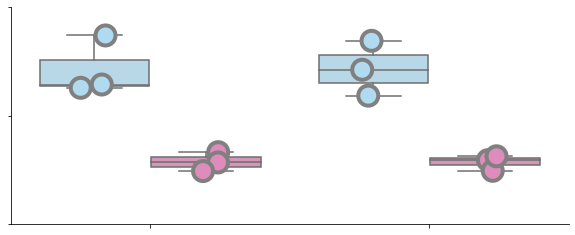

In [55]:
box_scatter_plot(['Diencephalon - Anterior pretectum cluster of vmat2 Neurons',
                 'Rhombencephalon - Gad1b Cluster 15'], df_comp_norm, 20, False, (10,4))

## Vglu2b comparison

In [4]:
ex_count_list = []
for fish in dic_vglu2b_95.keys():
    ex_count_list.append(dic_vglu2b_95[fish]['ex_count'])
df_vglu2b_ex = pd.concat(ex_count_list,axis=1)
df_vglu2b_ex.columns = dic_vglu2b_95.keys()
df_vglu2b_ex = pd.concat((df_vglu2b_ex,df_mask_volume),axis=1)
df_vglu2b_ex.rename(columns = {0:'total'}, inplace=True)

In [5]:
##excclude masks with in Eyes and one other mask below
df_vglu2b_ex = df_vglu2b_ex.drop('Rhombencephalon - VII\' Facial Motor and octavolateralis efferent neurons')
df_vglu2b_ex = df_vglu2b_ex.loc[~df_vglu2b_ex.index.str.contains('Eyes')]
df_vglu2b_ex_rank = (df_vglu2b_ex.iloc[:,:-1].mean(axis=1)/df_vglu2b_ex['total']).sort_values()
df_vglu2b_ex_rank = df_vglu2b_ex_rank.dropna()
df_vglu2b_ex_rank.tail(20)

Diencephalon - Pineal Vmat2 cluster                                        0.635046
Rhombencephalon - Area Postrema                                            0.637864
Diencephalon - Hypothalamus 6.7FRhcrtR-Gal4 cluster 1                      0.649604
Telencephalon - Pallium                                                    0.664168
Rhombencephalon - MiR2                                                     0.671004
Rhombencephalon - Vmat2 Stripe1                                            0.684225
Telencephalon - Vglut2 rind                                                0.686203
Diencephalon - Hypothalamus Olig2 cluster                                  0.699301
Diencephalon - Medial vglut2 cluster                                       0.708120
Mesencephalon - Torus Longitudinalis                                       0.738812
Rhombencephalon - Gad1b Cluster 14                                         0.748099
Telencephalon - Olfactory bulb dopaminergic neuron areas                   0

In [6]:
## compute the vglu2b expression of big masks 
df_bigmask = df_vglu2b_ex.loc[df_vglu2b_ex.index.str.split('-').str[-1].str.len()==0].transpose()
df_bigmask = pd.concat((metadata.sort_values('Geno').set_index('Fish_id'),df_bigmask), axis=1)
df_bigmask = df_bigmask.drop('total')
df_bigmask['Whole_brain'] = df_bigmask.iloc[:,1:].sum(axis=1)

In [7]:
df_bigmask

,Geno,Diencephalon -,Mesencephalon -,Rhombencephalon -,Telencephalon -,Whole_brain
20230721-1D,SDA,1771470.0,2613359.0,1979408.0,973463.0,7337700.0
20230721-13A,SDA,1920539.0,2575959.0,1985944.0,918960.0,7401402.0
20230721-5E,SDA,1656420.0,2158405.0,1763952.0,989580.0,6568357.0
20230721-7C,VDA,1731026.0,2466531.0,2014337.0,977636.0,7189530.0
20230721-13F,VDA,1771687.0,2420488.0,2030845.0,1045980.0,7269000.0
20230721-19F,VDA,1506149.0,2130904.0,1899751.0,1044195.0,6580999.0


In [9]:
## comparison of each big mask didn't detect difference between three genotypes
p_val_list = []
for bigmask in df_bigmask.columns[1:5]:
    p_val = pg.ancova(data = df_bigmask, dv = bigmask, covar='Whole_brain', between='Geno')
    p_val = p_val.iloc[0,4]
    p_val_list.append(p_val)
df_com_res_bigmask = pd.Series(p_val_list, index = df_bigmask.columns[1:5])
df_com_res_bigmask

Diencephalon -       0.195748
Mesencephalon -      0.202643
Rhombencephalon -    0.011182
Telencephalon -      0.149999
dtype: float64

In [8]:
df_ex_count = df_vglu2b_ex.copy()
df_comp = pd.concat((metadata[metadata['Fish_id'].isin(df_ex_count.columns)].sort_values('Geno').set_index('Fish_id'),
                     df_ex_count.transpose()),
          axis=1)
df_comp = df_comp.dropna()
#eliminate masks with 0 experssion in one individual
df_comp = df_comp.loc[:,~(df_comp==0).any()]
df_comp

,Geno,Diencephalon -,Diencephalon - Anterior group of the posterior tubercular vmat2 neurons,Diencephalon - Anterior preoptic dopaminergic cluster,Diencephalon - Anterior pretectum cluster of vmat2 Neurons,Diencephalon - Caudal Hypothalamus,Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum,Diencephalon - Dopaminergic Cluster 3 - hypothalamus,...,Telencephalon - S1181t Cluster,Telencephalon - Subpallial Gad1b cluster,Telencephalon - Subpallial Otpb Cluster 2,Telencephalon - Subpallial Otpb strip,Telencephalon - Subpallial Vglut2 Cluster,Telencephalon - Subpallial dopaminergic cluster,Telencephalon - Subpallium,Telencephalon - Telencephalic Migrated Area 4 (M4),Telencephalon - Vglut2 rind,Telencephalon - Vmat2 cluster
20230721-1D,SDA,1771470.0,4801.0,1645.0,48296.0,7426.0,82298.0,6583.0,6799.0,5275.0,...,4118.0,65964.0,7086.0,4309.0,9695.0,5527.0,171631.0,5193.0,211465.0,20285.0
20230721-13A,SDA,1920539.0,5646.0,801.0,47299.0,35660.0,98494.0,9158.0,8203.0,6176.0,...,2750.0,55298.0,4758.0,3899.0,2386.0,3756.0,137331.0,9224.0,182871.0,19426.0
20230721-5E,SDA,1656420.0,5092.0,1231.0,38898.0,12551.0,119537.0,10057.0,6413.0,3742.0,...,1575.0,59661.0,5094.0,7461.0,5973.0,3986.0,149848.0,12066.0,209554.0,19506.0
20230721-7C,VDA,1731026.0,5518.0,763.0,45276.0,26374.0,80632.0,11546.0,12053.0,5529.0,...,3702.0,69383.0,8561.0,6341.0,4838.0,3941.0,171774.0,6660.0,243577.0,15626.0
20230721-13F,VDA,1771687.0,5549.0,1893.0,48728.0,19797.0,138765.0,8205.0,5679.0,2691.0,...,2214.0,57796.0,3252.0,8361.0,15672.0,3857.0,177179.0,5330.0,216370.0,19556.0
20230721-19F,VDA,1506149.0,4504.0,1220.0,39423.0,28177.0,91928.0,4618.0,6365.0,2201.0,...,2193.0,63054.0,4929.0,8404.0,14814.0,4325.0,186907.0,7400.0,229135.0,18439.0


In [11]:
df_comp_norm = ratio_median_norm(df_comp)
df_comp_norm

,Geno,Diencephalon - Anterior group of the posterior tubercular vmat2 neurons,Diencephalon - Anterior preoptic dopaminergic cluster,Diencephalon - Anterior pretectum cluster of vmat2 Neurons,Diencephalon - Caudal Hypothalamus,Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum,Diencephalon - Dopaminergic Cluster 3 - hypothalamus,Diencephalon - Dopaminergic Cluster 4/5 - posterior tuberculum and hypothalamus,...,Telencephalon - Subpallial Vglut2 Cluster,Telencephalon - Subpallial dopaminergic cluster,Telencephalon - Subpallium,Telencephalon - Telencephalic Migrated Area 4 (M4),Telencephalon - Vglut2 rind,Telencephalon - Vmat2 cluster,Diencephalon -,Mesencephalon -,Rhombencephalon -,Telencephalon -
20230721-1D,SDA,4625.421536,1584.840331,46529.755991,7154.422064,79288.261110,6342.251609,6550.352223,5082.086774,12908.018692,...,9340.441948,5324.870825,165354.243633,5003.085615,203731.465353,19543.152648,1771470.0,2613359.0,1979408.0,973463.0
20230721-13A,SDA,5165.654363,732.853196,43274.935481,32626.148529,90114.410353,8378.863383,7505.112069,5650.563469,11473.132433,...,2183.005900,3436.450193,125647.268750,8439.248290,167312.854953,17773.291119,1920539.0,2575959.0,1985944.0,918960.0
20230721-5E,SDA,5403.076558,1306.203308,41274.326779,13317.756065,126839.662713,10671.394530,6804.778077,3970.603394,12621.680216,...,6337.897934,4229.509655,159002.399075,12803.126817,222355.912230,20697.645590,1656420.0,2158405.0,1763952.0,989580.0
20230721-7C,VDA,5083.259485,702.886370,41708.890260,24296.101062,74279.336501,10636.338169,11103.393725,5093.392840,7480.258612,...,4456.833887,3630.504826,158240.633348,6135.286004,224386.570429,14394.891757,1731026.0,2466531.0,2014337.0,977636.0
20230721-13F,VDA,5484.653726,1871.048748,48162.949497,19567.433738,137155.879308,8109.854716,5613.146244,2659.795130,7196.569432,...,15490.267290,3812.274179,175124.430079,5268.193253,213860.970748,19329.228377,1771687.0,2420488.0,2030845.0,1045980.0
20230721-19F,VDA,4769.005070,1291.782013,41742.559255,29834.870307,97336.833503,4889.712570,6739.502059,2330.501812,7850.222822,...,15685.621916,4579.473119,197904.180876,7835.399094,242616.779923,19523.908635,1506149.0,2130904.0,1899751.0,1044195.0


In [12]:
arraylist = [df_comp_norm['Geno'].to_list()]
while len(arraylist)<20:#the maximum round of permutation test based on current dataset is 210
    
    array = df_comp_norm['Geno'].sample(frac=1).to_list()
    if array in arraylist:
        next
    else:
        arraylist.append(array)

In [13]:
df_perm = df_comp_norm.copy()
permpvals = []
for array in arraylist:
    num = arraylist.index(array)
    df_perm['Geno'] = array
    permpvals.append(anova_comp(df_perm))
df_perm = pd.concat(permpvals,axis=1)
df_exp_anova = anova_comp(df_comp_norm)['p-unc']
df_padj_anova = ((df_exp_anova-df_perm['p-unc'].mean(axis=1))/df_perm['p-unc'].std(axis=1)).apply(lambda x: 1-norm.sf((x)))

In [14]:
sigmask_perm_anova = df_padj_anova.loc[df_padj_anova<0.05].index.to_list()
pco_list = []
masks = []
for mask in sigmask_perm_anova:
    covariable = mask.split('-')[0]+'-'
    pco = pg.ancova(data = df_comp_norm, dv = mask, covar=covariable, between='Geno').iloc[1,4]
    pval = pg.ancova(data = df_comp_norm, dv = mask, covar=covariable, between='Geno').iloc[0,4]
    pco_list.append(pco)
    if pco<0.05 and pval>0.05:
        masks.append(mask)
        sigmask_perm_anova.remove(mask)
sigmask_perm_anova

['Diencephalon - Dopaminergic Cluster 4/5 - posterior tuberculum and hypothalamus',
 'Diencephalon - Pineal',
 'Diencephalon - Pineal Vmat2 cluster ',
 'Rhombencephalon - Gad1b Cluster 13']

In [15]:
df_perm = df_comp_norm.copy()
permpvals = []
for array in arraylist:
    df_perm['Geno'] = array
    permpvals.append(ancova(df_perm))
df_perm = pd.concat(permpvals,axis=1)
df_exp_ancova = ancova(df_comp_norm)
df_padj_ancova = ((df_exp_ancova-df_perm.mean(axis=1))/df_perm.std(axis=1)).apply(lambda x: 1-norm.sf((x)))

In [16]:
df_exp_ancova = ancova(df_comp_norm)

sigmask_perm_ancova = df_padj_ancova.loc[df_padj_ancova<0.05].index

In [20]:
sigmask_perm_ancova

Index(['Diencephalon - Dopaminergic Cluster 4/5 - posterior tuberculum and hypothalamus',
       'Diencephalon - Pineal Vmat2 cluster ',
       'Rhombencephalon - Gad1b Cluster 13', 'Rhombencephalon - MiD3',
       'Telencephalon - Vmat2 cluster'],
      dtype='object')

In [26]:
sv_sigmasks = set(sigmask_perm_anova)|set(sigmask_perm_ancova)
list(sv_sigmasks)

['Diencephalon - Dopaminergic Cluster 4/5 - posterior tuberculum and hypothalamus',
 'Diencephalon - Pineal',
 'Rhombencephalon - Gad1b Cluster 13',
 'Rhombencephalon - MiD3',
 'Telencephalon - Vmat2 cluster',
 'Diencephalon - Pineal Vmat2 cluster ']

In [27]:
df_sv_stats = pd.concat((df_exp_anova, df_exp_ancova, df_padj_anova, df_padj_ancova),axis=1)
df_sv_stats.columns = ['p_unc_anova', 'p_unc_ancova','p_adj_anova', 'p_adj_ancova']
df_sv_stats = df_sv_stats.loc[~df_sv_stats.index.isin(df_bigmask.columns)]
df_sv_stats = df_sv_stats.dropna()

In [24]:
wdir = '/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/HCR/HCR_analysis/'

df_sv_stats.to_csv(wdir+'sv_vglut_stats.csv')

In [30]:
df_comp_norm.groupby('Geno').mean()[sv_sigmasks].diff()

,Diencephalon - Dopaminergic Cluster 4/5 - posterior tuberculum and hypothalamus,Diencephalon - Pineal,Rhombencephalon - Gad1b Cluster 13,Rhombencephalon - MiD3,Telencephalon - Vmat2 cluster,Diencephalon - Pineal Vmat2 cluster
Geno,,,,,,
SDA,NaN,NaN,NaN,NaN,NaN,NaN
VDA,-4825.260158,-4054.852414,-2459.32464,1127.240466,-1588.686863,-2278.235916


In [32]:
df_comp.transpose().to_csv(wdir+'sv_vglut_ex_count_raw_20230819.csv')
df_comp_norm.transpose().to_csv(wdir+'sv_vglut_ex_count_norm_20230819.csv')